In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [3]:
image=cv2.imread('xray1.jpeg')
cv2.imshow("Data",image)

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
from astropy.convolution import Gaussian2DKernel
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import detect_threshold, detect_sources, deblend_sources
data = gray_image
threshold = detect_threshold(data, nsigma=2.)

In [6]:
from astropy.stats import https://towardsdata science.com/music-in-python-2f054deb41f4
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
npixels = 5
segm = detect_sources(data, threshold, npixels=npixels, kernel=kernel)
segm_deblend = deblend_sources(data, segm, npixels=npixels,kernel=kernel, nlevels=32,contrast=0.001)

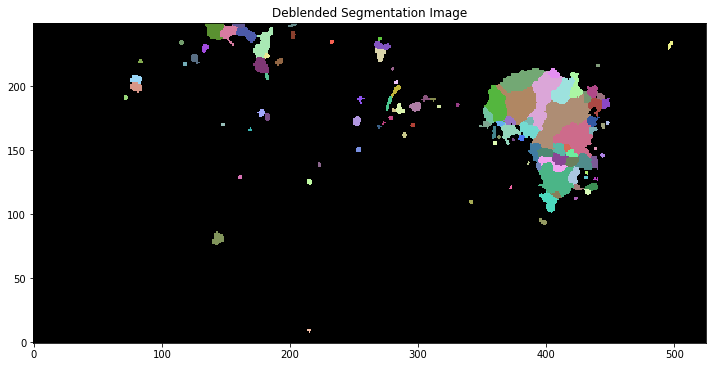

In [7]:
norm = ImageNormalize(stretch=SqrtStretch())
fig, ax = plt.subplots(1, 1, figsize=(10, 6.5))
cmap = segm_deblend.make_cmap(seed=123)
ax.imshow(segm_deblend, origin='lower', cmap=cmap, interpolation='nearest')
ax.set_title('Deblended Segmentation Image')
plt.tight_layout()

In [8]:
from photutils.segmentation import SourceCatalog
cat = SourceCatalog(data, segm_deblend)
tbl = cat.to_table()
tbl['xcentroid'].info.format = '.2f' 
tbl['ycentroid'].info.format = '.2f'
tbl['kron_flux'].info.format = '.2f'
print(tbl)

label xcentroid ycentroid ... segment_fluxerr kron_flux kron_fluxerr
                          ...                                       
----- --------- --------- ... --------------- --------- ------------
    1    215.04      9.26 ...             nan   3057.27          nan
    2    143.79     80.71 ...             nan  53278.13          nan
    3    397.40     93.99 ...             nan  27935.31          nan
    4    341.19    109.15 ...             nan   3695.31          nan
    5    422.84    112.06 ...             nan  12224.59          nan
    6    372.37    120.72 ...             nan   6484.33          nan
    7    215.44    125.10 ...             nan  12739.59          nan
    8    438.80    127.13 ...             nan  13946.16          nan
    9    161.09    128.82 ...             nan   7061.95          nan
   10    431.01    128.48 ...             nan   8658.75          nan
  ...       ...       ... ...             ...       ...          ...
  102    177.58    215.57 ...     

In [9]:
 # White keys are in Uppercase and black keys (sharps) are in lowercase
octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
base_freq = 440 #Frequency of Note A4
keys = np.array([x+str(y) for y in range(0,9) for x in octave])
# Trim to standard 88 keys
start = np.where(keys == 'A0')[0][0]
end = np.where(keys == 'C8')[0][0]
keys = keys[start:end+1]

note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
note_freqs[''] = 0.0 # stop

note_freqs

{'A0': 27.5,
 'a0': 29.13523509488062,
 'B0': 30.86770632850775,
 'C1': 32.70319566257483,
 'c1': 34.64782887210901,
 'D1': 36.70809598967594,
 'd1': 38.890872965260115,
 'E1': 41.20344461410875,
 'F1': 43.653528929125486,
 'f1': 46.2493028389543,
 'G1': 48.999429497718666,
 'g1': 51.91308719749314,
 'A1': 55.0,
 'a1': 58.27047018976124,
 'B1': 61.7354126570155,
 'C2': 65.40639132514966,
 'c2': 69.29565774421802,
 'D2': 73.41619197935188,
 'd2': 77.78174593052023,
 'E2': 82.4068892282175,
 'F2': 87.30705785825097,
 'f2': 92.4986056779086,
 'G2': 97.99885899543733,
 'g2': 103.82617439498628,
 'A2': 110.0,
 'a2': 116.54094037952248,
 'B2': 123.47082531403103,
 'C3': 130.8127826502993,
 'c3': 138.59131548843604,
 'D3': 146.8323839587038,
 'd3': 155.56349186104046,
 'E3': 164.81377845643496,
 'F3': 174.61411571650194,
 'f3': 184.9972113558172,
 'G3': 195.99771799087463,
 'g3': 207.65234878997256,
 'A3': 220.0,
 'a3': 233.08188075904496,
 'B3': 246.94165062806206,
 'C4': 261.6255653005986,


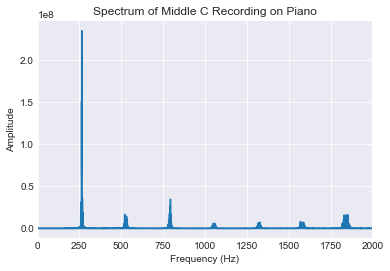

In [32]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

# Load data from wav file
sample_rate, middle_c = wavfile.read('data\mono_left.wav')

#FFT
t = np.arange(middle_c.shape[0])
freq = np.fft.fftfreq(t.shape[-1])*sample_rate
sp = np.fft.fft(middle_c) 

# Plot spectrum
plt.plot(freq, abs(sp.real))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Middle C Recording on Piano')
plt.xlim((0, 2000))
# plt.ylim(0,2000)
plt.grid()

In [22]:
middle_c

array([5, 5, 2, ..., 5, 5, 0], dtype=int16)

In [33]:
# Get positive frequency
idx = np.where(freq > 0)[0]
freq = freq[idx]
sp = sp[idx]

# Get dominant frequencies
sort = np.argsort(-abs(sp.real))[:100]
dom_freq = freq[sort]

# Round and calculate amplitude ratio
freq_ratio = np.round(dom_freq/261.6255653005986)
unique_freq_ratio = np.unique(freq_ratio)
amp_ratio = abs(sp.real[sort]/np.sum(sp.real[sort]))
factor = np.zeros((int(unique_freq_ratio[-1]), ))
for i in range(factor.shape[0]):
    idx = np.where(freq_ratio==i+1)[0]
    factor[i] = np.sum(amp_ratio[idx])
factor = factor/np.sum(factor)


In [34]:
factor

array([0.59338746, 0.10165299, 0.13776008, 0.        , 0.00685278,
       0.02477117, 0.13557553])

In [14]:
pip install pydub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\online\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
# Python3 program to illustrate
# splitting stereo audio to mono
# using pydub

# Import AudioSegment from pydub
import pydub
from pydub import AudioSegment

# Open the stereo audio file as
# an AudioSegment instance
stereo_audio = AudioSegment.from_file("data\media-ced7ee7e.wav", format="wav")

# Calling the split_to_mono method
# on the stereo audio file
mono_audios = stereo_audio.split_to_mono()

# Exporting/Saving the two mono
# audio files present at index 0(left)
# and index 1(right) of list returned
# by split_to_mono method
mono_left = mono_audios[0].export("data/mono_left.wav",
	format="wav")
mono_right = mono_audios[1].export(
	"data/mono_right.wav",
	format="wav")


C:\Users\online\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
